## 1. seoul.csv 파일을 DataFrame으로 불러와서 각 변수들에 대해서 요약통계량을 구해보라.

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 출력 시 (Colab 용)
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False 

# 윈도우는 아래 참고
# https://m.blog.naver.com/itisik/221789012960

In [52]:
import pandas as pd
seoul = pd.read_csv('seoul.csv', encoding='cp949')

In [53]:
seoul.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,40843.0,40087.000000,40086.000000,40085.000000
mean,108.0,11.756452,7.464354,16.764014
std,0.0,10.655657,10.880051,10.980574
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.200000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [54]:
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1908-01-01,108,-5.9,-9.1,-1.3
1,1908-01-02,108,-7.7,-13.9,-3.0
2,1908-01-03,108,-6.2,-10.8,-2.9
3,1908-01-04,108,-7.5,-12.8,-1.7
4,1908-01-05,108,-4.8,-11.3,-0.1


## 2. ‘date’라는 datetime변수를 추가하고 ‘날짜’변수와 ‘지점’변수를 제거하라.

In [55]:
seoul['date']=pd.to_datetime(seoul['날짜'])
seoul = seoul.drop(['날짜','지점'],axis=1)

In [56]:
seoul.dtypes

평균기온(℃)           float64
최저기온(℃)           float64
최고기온(℃)           float64
date       datetime64[ns]
dtype: object

In [57]:
seoul.columns

Index(['평균기온(℃)', '최저기온(℃)', '최고기온(℃)', 'date'], dtype='object')

## 3.  ‘date’로부터 년도, 월, 요일에 해당하는 정보를 추출하여 ‘year’, ‘month’, ‘week’변수를 추가하라.

In [58]:
seoul['year'] = seoul['date'].dt.year
seoul['month'] = seoul['date'].dt.month
seoul['week'] = seoul['date'].dt.weekday

## 4. ‘date’를 line index로 설정하라. 

In [59]:
seoul.index = seoul['date']

In [60]:
seoul.head(5)

,평균기온(℃),최저기온(℃),최고기온(℃),date,year,month,week
date,,,,,,,
1908-01-01,-5.9,-9.1,-1.3,1908-01-01,1908,1,2
1908-01-02,-7.7,-13.9,-3.0,1908-01-02,1908,1,3
1908-01-03,-6.2,-10.8,-2.9,1908-01-03,1908,1,4
1908-01-04,-7.5,-12.8,-1.7,1908-01-04,1908,1,5
1908-01-05,-4.8,-11.3,-0.1,1908-01-05,1908,1,6


## 5. 1980년부터 2020년 사이의 ‘평균기온(℃)’의 연도별 최댓값을 선그래프로 작성하라. 

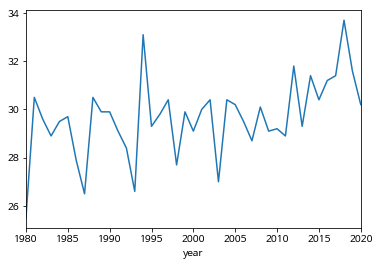

In [61]:
seoul.loc[seoul['year'].between(1980,2020)].groupby(['year'])['평균기온(℃)'].max().plot()

## 6. 전체기간에 대해 ‘최고기온(℃)’에 대한 히스토그램과 월별, 요일별 상자그림을 작성하라.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F1684E128>]],
      dtype=object)

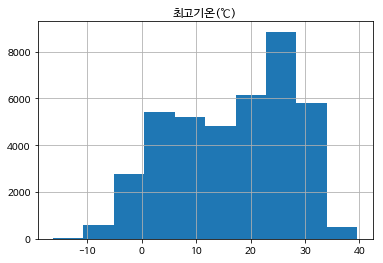

In [63]:
#전체기간에 대해 '최고기온'에 대한 히스토그램
seoul.hist(column='최고기온(℃)')

월별


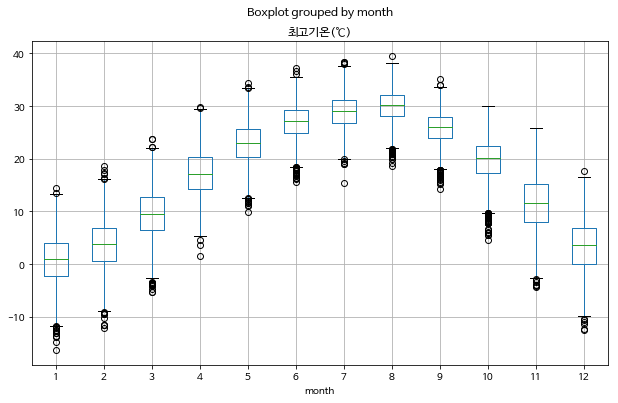

In [75]:
print("월별")
seoul.boxplot(column='최고기온(℃)',by='month',figsize=(10,6))

요일별


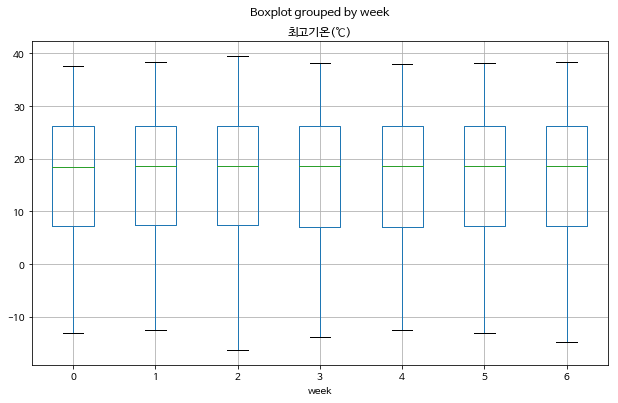

In [76]:
print("요일별")
seoul.boxplot(column='최고기온(℃)',by='week',figsize=(10,6))